## Test statistics on a toy likelihood

Using a Gaussian likelihood, test minimizer and scan objects

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 140
mpl.rcParams['figure.dpi'] = 140
import numpy as np
# our modules
import toy_likelihood
import likelihood_parameter
import iminuit_minimizer
import grid_scanner

Setup toy likelihood

In [2]:
# Likelihood parameters
free_params=[]
free_params.append(likelihood_parameter.LikelihoodParameter(name='A',
                        value=1000.0,min_value=900.0,max_value=1100.0))
free_params.append(likelihood_parameter.LikelihoodParameter(name='B',
                        value=0.5,min_value=0.0,max_value=1.0))
free_params.append(likelihood_parameter.LikelihoodParameter(name='C',
                        value=0.0,min_value=-0.01,max_value=0.01))

In [3]:
prior_rms=0.1
like=toy_likelihood.ToyLikelihood(free_params,prior_rms)

input free_parameter
A = 1000.0
B = 0.5
C = 0.0


In [4]:
# choose random starting point, and test likelihood
start=np.random.rand(len(free_params))
print('starting point =',start)
print('log_prob =',like.log_prob(values=start))

starting point = [0.02678408 0.75956199 0.14968517]
log_prob = -20.70131070243852


### Setup and run iminuit minimizer

In [5]:
minimizer = iminuit_minimizer.IminuitMinimizer(like,start=start)

In [6]:
minimizer.minimize()

will run migrad
------------------------------------------------------------------
| FCN = 1.368e-18               |      Ncalls=36 (36 total)      |
| EDM = 1.37e-18 (Goal: 0.0001) |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
will compute Hessian matrix


In [7]:
print('best-fit (cube) values =',minimizer.minimizer.np_values())
print('uncertainties =',minimizer.minimizer.np_errors())

best-fit (cube) values = [0.5 0.5 0.5]
uncertainties = [0.1 0.1 0.1]


In [8]:
# get proper errors from likelihood scans (same since Gaussian is likelihood)
minimizer.minimizer.minos()

------------------------------------------------------------------------------------
|          |           A           |           B           |           C           |
------------------------------------------------------------------------------------
|  Error   |   -0.1    |    0.1    |   -0.1    |    0.1    |   -0.1    |    0.1    |
|  Valid   |   True    |   True    |   True    |   True    |   True    |   True    |
| At Limit |   False   |   False   |   False   |   False   |   False   |   False   |
| Max FCN  |   False   |   False   |   False   |   False   |   False   |   False   |
| New Min  |   False   |   False   |   False   |   False   |   False   |   False   |
------------------------------------------------------------------------------------

In [9]:
# get parameters covariance
minimizer.minimizer.np_covariance()

array([[ 1.00000000e-02,  7.52316417e-35, -8.67361760e-19],
       [ 7.52316417e-35,  1.00000000e-02, -8.67361754e-19],
       [-8.67361760e-19, -8.67361754e-19,  1.00000000e-02]])

### Use iminuit functions to make plots (parameter values in unit cube)

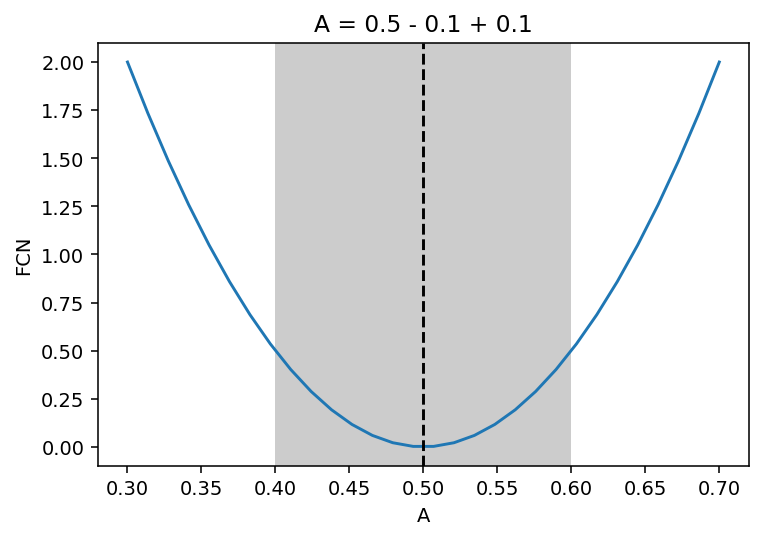

In [10]:
# scan one parameter at a time, fixing other parameters to best fit 
_=minimizer.minimizer.draw_profile(vname='A',bins=30)

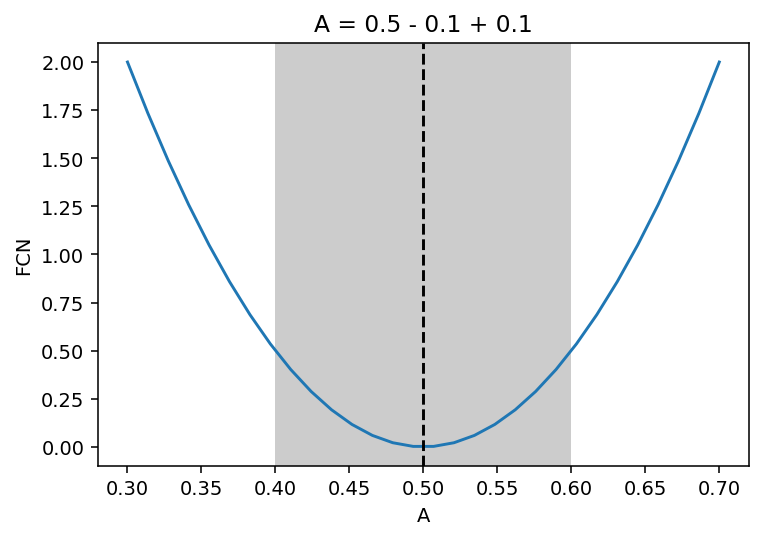

In [11]:
# scan one parameter at a time, fixing other parameters (identical to above, since likelihood is Gaussian)
minimizer.minimizer.draw_mnprofile(vname='A',bins=30);

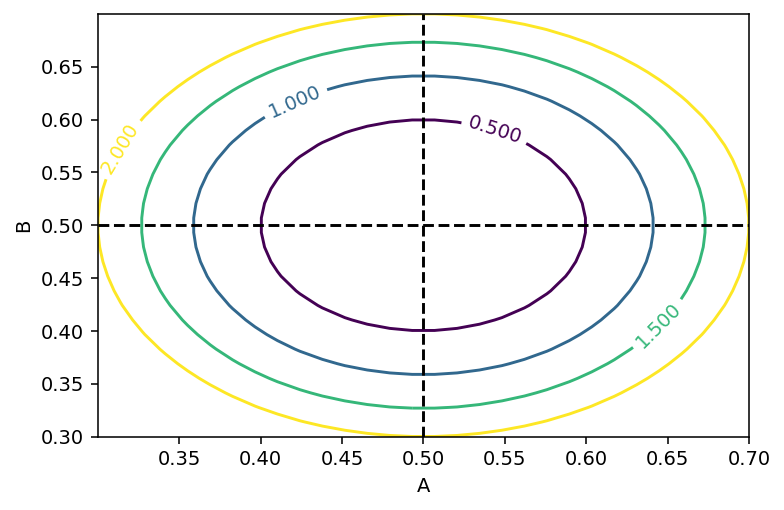

In [12]:
# 2D contours, fixing other parameters to best-fit (note that contours are 1D sigmas, not 2D)
_=minimizer.minimizer.draw_contour('A','B',bins=30);

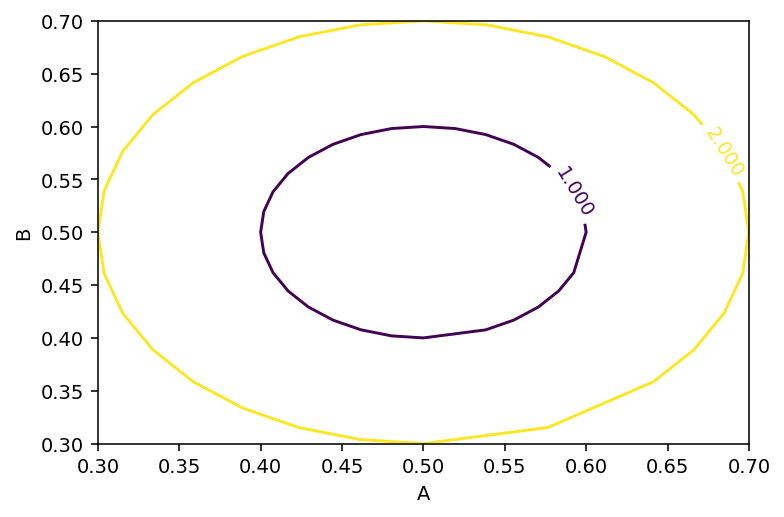

In [13]:
# 2D contours, minimizing other parameters (note that contours are 1D sigmas, not 2D)
minimizer.minimizer.draw_mncontour('A','B',numpoints=30);

### Make plots with our own modules - Gaussian ellipses

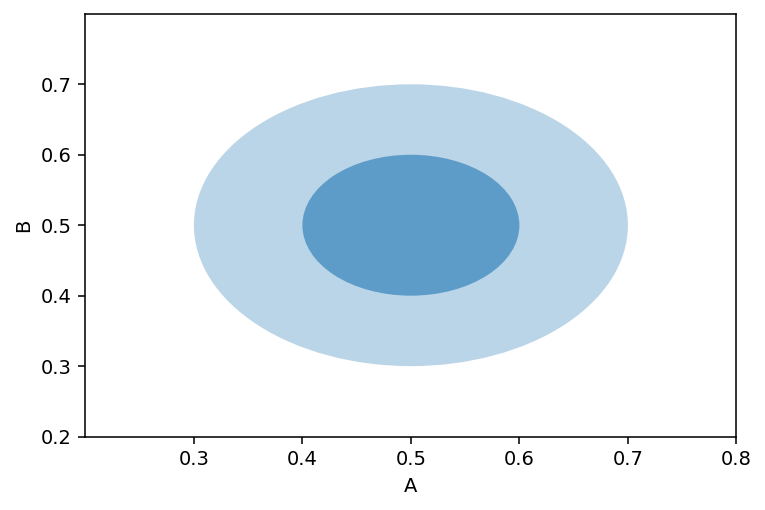

In [14]:
# Gaussian ellipses, using unit cube values - note that contours are 1D sigmas (Delta chi2 = 1,4), not 2D
minimizer.plot_ellipses('A','B',cube_values=True) 

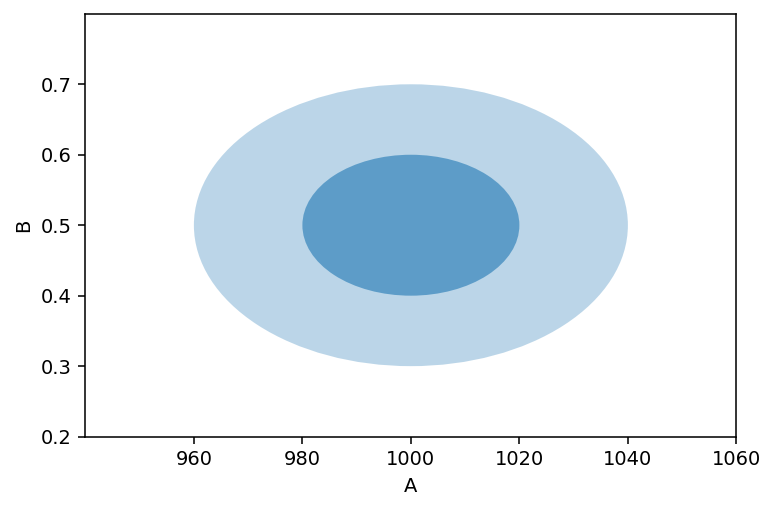

In [15]:
# Gaussian ellipse, using absolute parameter values
minimizer.plot_ellipses('A','B',cube_values=False) 

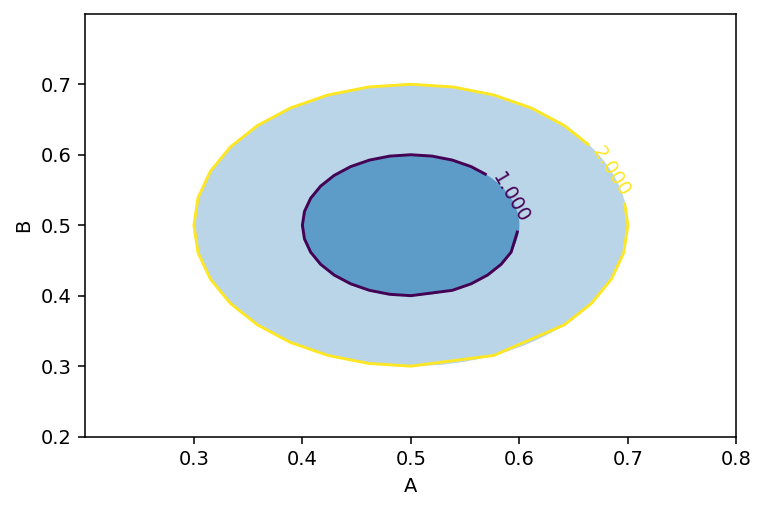

In [16]:
# compare with function from iminuit - contours are still 1D sigmas, not 68/95% probabilities
minimizer.plot_ellipses('A','B',cube_values=True)
# this will take a while, it computes several minimizations
minimizer.minimizer.draw_mncontour('A','B',numpoints=30)

## Try our own 1D scans

In [17]:
A=free_params[0]
scan1D=grid_scanner.Scan1D(like,param_grid={'name':A.name,'minval':A.min_value,
                                           'maxval':A.max_value,'nval':30})

will compute grid scan
will run migrad
------------------------------------------------------------------
| FCN = 0                       |      Ncalls=29 (29 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
global chi2 = 0.0 ; best-fit = [0.5 0.5 0.5]
0 A 900.0 in cube 0.0
will run migrad
------------------------------------------------------------------
| FCN =

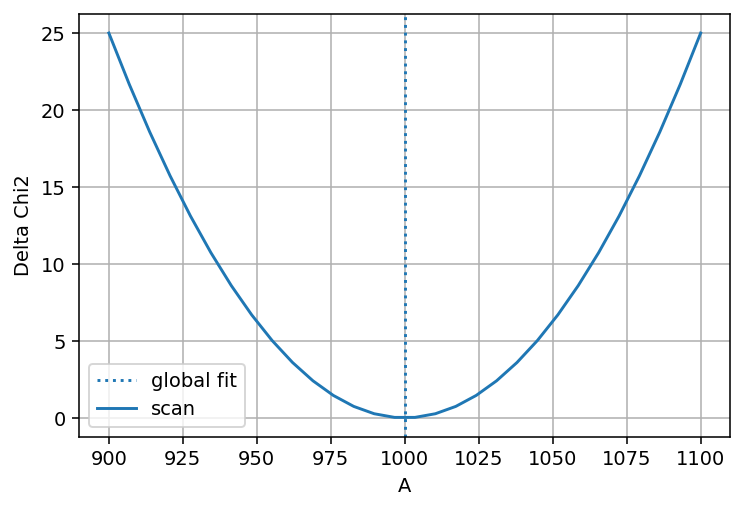

In [18]:
scan1D.plot_grid_scan(cube_values=False,yaxis='DeltaChi2')

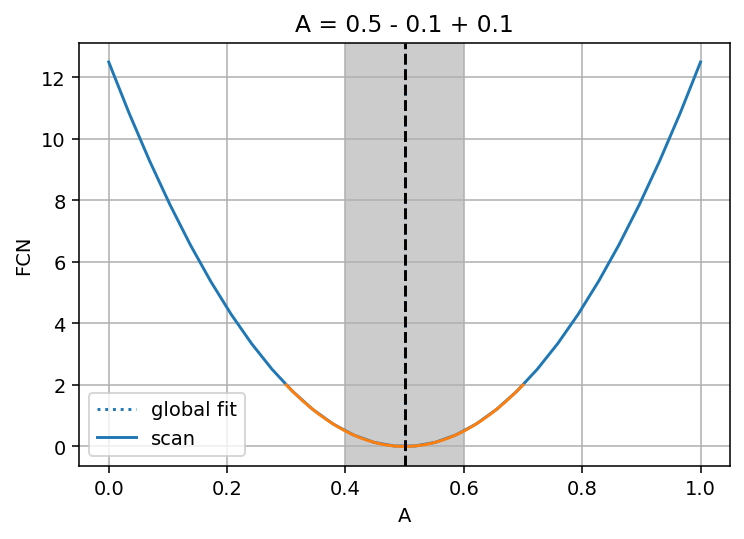

In [19]:
# compare with function from iminuit (cube values)
scan1D.plot_grid_scan(cube_values=True,yaxis='MinusLogLike')
minimizer.minimizer.draw_mnprofile(vname='A',bins=30);

## Try our own 2D scans

In [20]:
p1=free_params[0]
p2=free_params[1]
param_grid_1={'name':p1.name,'minval':p1.min_value,'maxval':p1.max_value,'nval':50}
param_grid_2={'name':p2.name,'minval':p2.min_value,'maxval':p2.max_value,'nval':50}
scan2D=grid_scanner.Scan2D(like,param_grid_1=param_grid_1,param_grid_2=param_grid_2)

In [21]:
# compute actual scan (might take a few seconds)
scan2D.get_grid_scan();

will compute grid scan
will run migrad
------------------------------------------------------------------
| FCN = 0                       |      Ncalls=29 (29 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
global chi2 = 0.0 ; best-fit = [0.5 0.5 0.5]
0 A 900.0 in cube 0.0
1 B 0.0 in cube 0.0
will run migrad
------------------------------------------------------

0 A 900.0 in cube 0.0
1 B 0.02040816326530612 in cube 0.02040816326530612
will run migrad
------------------------------------------------------------------
| FCN = 24                      |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 904.0816326530612 in cube 0.02040816326530603
1 B 0.02040816326530612 in cube 0.02040816326530612
will

------------------------------------------------------------------
0 A 1071.4285714285716 in cube 0.8571428571428578
1 B 0.02040816326530612 in cube 0.02040816326530612
will run migrad
------------------------------------------------------------------
| FCN = 17.88                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1075.51

1 B 0.04081632653061224 in cube 0.04081632653061224
will run migrad
------------------------------------------------------------------
| FCN = 12.05                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.04081632653061224 in cube 0.04081632653061224
will run migrad
----------

0 A 1002.0408163265306 in cube 0.510204081632653
1 B 0.061224489795918366 in cube 0.061224489795918366
will run migrad
------------------------------------------------------------------
| FCN = 9.631                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1006.1224489795918 in cube 0.530612244897959
1 B 0.061224489795918366 in 

will run migrad
------------------------------------------------------------------
| FCN = 10.26                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 969.3877551020408 in cube 0.3469387755102042
1 B 0.08163265306122448 in cube 0.08163265306122448
will run migrad
---------------------------------------------------------------

1 B 0.1020408163265306 in cube 0.1020408163265306
will run migrad
------------------------------------------------------------------
| FCN = 13.59                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.1020408163265306 in cube 0.1020408163265306
will run migrad
--------------

0 A 900.0 in cube 0.0
1 B 0.12244897959183673 in cube 0.12244897959183673
will run migrad
------------------------------------------------------------------
| FCN = 19.63                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 904.0816326530612 in cube 0.02040816326530603
1 B 0.12244897959183673 in cube 0.12244897959183673
will

1 B 0.12244897959183673 in cube 0.12244897959183673
will run migrad
------------------------------------------------------------------
| FCN = 12.8                    |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1071.4285714285716 in cube 0.8571428571428578
1 B 0.12244897959183673 in cube 0.12244897959183673
will run migrad
----------

------------------------------------------------------------------
0 A 1022.4489795918367 in cube 0.6122448979591837
1 B 0.14285714285714285 in cube 0.14285714285714285
will run migrad
------------------------------------------------------------------
| FCN = 7.007                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1026.53

0 A 924.4897959183673 in cube 0.12244897959183675
1 B 0.16326530612244897 in cube 0.16326530612244897
will run migrad
------------------------------------------------------------------
| FCN = 12.8                    |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 928.5714285714286 in cube 0.14285714285714277
1 B 0.16326530612244897 in c

1 B 0.16326530612244897 in cube 0.16326530612244897
will run migrad
------------------------------------------------------------------
| FCN = 8.424                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1051.0204081632653 in cube 0.7551020408163265
1 B 0.16326530612244897 in cube 0.16326530612244897
will run migrad
----------

will run migrad
------------------------------------------------------------------
| FCN = 5.133                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 993.8775510204082 in cube 0.46938775510204095
1 B 0.18367346938775508 in cube 0.18367346938775508
will run migrad
--------------------------------------------------------------

1 B 0.2040816326530612 in cube 0.2040816326530612
will run migrad
------------------------------------------------------------------
| FCN = 10.05                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.2040816326530612 in cube 0.2040816326530612
will run migrad
--------------

1 B 0.2040816326530612 in cube 0.2040816326530612
will run migrad
------------------------------------------------------------------
| FCN = 16.88                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 900.0 in cube 0.0
1 B 0.22448979591836732 in cube 0.22448979591836732
will run migrad
----------------------------------------

1 B 0.22448979591836732 in cube 0.22448979591836732
will run migrad
------------------------------------------------------------------
| FCN = 4.675                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1030.6122448979593 in cube 0.6530612244897963
1 B 0.22448979591836732 in cube 0.22448979591836732
will run migrad
----------

------------------------------------------------------------------
0 A 932.6530612244898 in cube 0.1632653061224488
1 B 0.24489795918367346 in cube 0.24489795918367346
will run migrad
------------------------------------------------------------------
| FCN = 8.923                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346

0 A 1067.3469387755101 in cube 0.8367346938775506
1 B 0.24489795918367346 in cube 0.24489795918367346
will run migrad
------------------------------------------------------------------
| FCN = 8.923                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1071.4285714285716 in cube 0.8571428571428578
1 B 0.24489795918367346 in c

0 A 973.469387755102 in cube 0.3673469387755102
1 B 0.26530612244897955 in cube 0.26530612244897955
will run migrad
------------------------------------------------------------------
| FCN = 3.634                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 977.5510204081633 in cube 0.38775510204081626
1 B 0.26530612244897955 in cub

------------------------------------------------------------------
0 A 920.4081632653061 in cube 0.10204081632653071
1 B 0.2857142857142857 in cube 0.2857142857142857
will run migrad
------------------------------------------------------------------
| FCN = 10.21                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 924.48979

will run migrad
------------------------------------------------------------------
| FCN = 8.257                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 932.6530612244898 in cube 0.1632653061224488
1 B 0.3061224489795918 in cube 0.3061224489795918
will run migrad
-----------------------------------------------------------------

1 B 0.3061224489795918 in cube 0.3061224489795918
will run migrad
------------------------------------------------------------------
| FCN = 14.38                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 900.0 in cube 0.0
1 B 0.32653061224489793 in cube 0.32653061224489793
will run migrad
----------------------------------------

0 A 1067.3469387755101 in cube 0.8367346938775506
1 B 0.32653061224489793 in cube 0.32653061224489793
will run migrad
------------------------------------------------------------------
| FCN = 7.174                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1071.4285714285716 in cube 0.8571428571428578
1 B 0.32653061224489793 in c

1 B 0.3469387755102041 in cube 0.3469387755102041
will run migrad
------------------------------------------------------------------
| FCN = 2.343                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1034.6938775510205 in cube 0.6734693877551023
1 B 0.3469387755102041 in cube 0.3469387755102041
will run migrad
--------------

0 A 997.9591836734694 in cube 0.489795918367347
1 B 0.36734693877551017 in cube 0.36734693877551017
will run migrad
------------------------------------------------------------------
| FCN = 0.885                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1002.0408163265306 in cube 0.510204081632653
1 B 0.36734693877551017 in cube

0 A 965.3061224489796 in cube 0.32653061224489816
1 B 0.3877551020408163 in cube 0.3877551020408163
will run migrad
------------------------------------------------------------------
| FCN = 2.135                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 969.3877551020408 in cube 0.3469387755102042
1 B 0.3877551020408163 in cube 

1 B 0.4081632653061224 in cube 0.4081632653061224
will run migrad
------------------------------------------------------------------
| FCN = 6.799                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 932.6530612244898 in cube 0.1632653061224488
1 B 0.4081632653061224 in cube 0.4081632653061224
will run migrad
---------------

0 A 1100.0 in cube 1.0
1 B 0.4081632653061224 in cube 0.4081632653061224
will run migrad
------------------------------------------------------------------
| FCN = 12.92                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 900.0 in cube 0.0
1 B 0.42857142857142855 in cube 0.42857142857142855
will run migrad
-----------------

------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.42857142857142855 in cube 0.42857142857142855
will run migrad
------------------------------------------------------------------
| FCN = 2.135                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1042.85

0 A 948.9795918367347 in cube 0.2448979591836735
1 B 0.44897959183673464 in cube 0.44897959183673464
will run migrad
------------------------------------------------------------------
| FCN = 3.384                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 953.0612244897959 in cube 0.2653061224489795
1 B 0.44897959183673464 in cub

------------------------------------------------------------------
0 A 1063.265306122449 in cube 0.8163265306122446
1 B 0.44897959183673464 in cube 0.44897959183673464
will run migrad
------------------------------------------------------------------
| FCN = 5.133                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1067.346

1 B 0.4693877551020408 in cube 0.4693877551020408
will run migrad
------------------------------------------------------------------
| FCN = 0.9267                  |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 977.5510204081633 in cube 0.38775510204081626
1 B 0.4693877551020408 in cube 0.4693877551020408
will run migrad
--------------

0 A 1063.265306122449 in cube 0.8163265306122446
1 B 0.4693877551020408 in cube 0.4693877551020408
will run migrad
------------------------------------------------------------------
| FCN = 5.05                    |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1067.3469387755101 in cube 0.8367346938775506
1 B 0.4693877551020408 in cube 

------------------------------------------------------------------
0 A 953.0612244897959 in cube 0.2653061224489795
1 B 0.4897959183673469 in cube 0.4897959183673469
will run migrad
------------------------------------------------------------------
| FCN = 2.759                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 957.142857

will run migrad
------------------------------------------------------------------
| FCN = 12.51                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 900.0 in cube 0.0
1 B 0.5102040816326531 in cube 0.5102040816326531
will run migrad
------------------------------------------------------------------
| FCN = 12.51            

------------------------------------------------------------------
| FCN = 11.51                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1100.0 in cube 1.0
1 B 0.5102040816326531 in cube 0.5102040816326531
will run migrad
------------------------------------------------------------------
| FCN = 12.51                   |       

1 B 0.5306122448979591 in cube 0.5306122448979591
will run migrad
------------------------------------------------------------------
| FCN = 5.05                    |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1067.3469387755101 in cube 0.8367346938775506
1 B 0.5306122448979591 in cube 0.5306122448979591
will run migrad
--------------

0 A 1030.6122448979593 in cube 0.6530612244897963
1 B 0.5510204081632653 in cube 0.5510204081632653
will run migrad
------------------------------------------------------------------
| FCN = 1.302                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1034.6938775510205 in cube 0.6734693877551023
1 B 0.5510204081632653 in cube

1 B 0.5714285714285714 in cube 0.5714285714285714
will run migrad
------------------------------------------------------------------
| FCN = 0.302                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 997.9591836734694 in cube 0.489795918367347
1 B 0.5714285714285714 in cube 0.5714285714285714
will run migrad
----------------

1 B 0.5918367346938775 in cube 0.5918367346938775
will run migrad
------------------------------------------------------------------
| FCN = 2.301                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 965.3061224489796 in cube 0.32653061224489816
1 B 0.5918367346938775 in cube 0.5918367346938775
will run migrad
--------------

0 A 928.5714285714286 in cube 0.14285714285714277
1 B 0.6122448979591836 in cube 0.6122448979591836
will run migrad
------------------------------------------------------------------
| FCN = 7.007                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 932.6530612244898 in cube 0.1632653061224488
1 B 0.6122448979591836 in cube 

1 B 0.6122448979591836 in cube 0.6122448979591836
will run migrad
------------------------------------------------------------------
| FCN = 12.13                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1100.0 in cube 1.0
1 B 0.6122448979591836 in cube 0.6122448979591836
will run migrad
-----------------------------------------

------------------------------------------------------------------
0 A 1063.265306122449 in cube 0.8163265306122446
1 B 0.6326530612244897 in cube 0.6326530612244897
will run migrad
------------------------------------------------------------------
| FCN = 5.883                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1067.34693

------------------------------------------------------------------
0 A 944.8979591836735 in cube 0.22448979591836746
1 B 0.6530612244897959 in cube 0.6530612244897959
will run migrad
------------------------------------------------------------------
| FCN = 4.967                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 948.97959

------------------------------------------------------------------
0 A 1063.265306122449 in cube 0.8163265306122446
1 B 0.6530612244897959 in cube 0.6530612244897959
will run migrad
------------------------------------------------------------------
| FCN = 6.175                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1067.34693

1 B 0.673469387755102 in cube 0.673469387755102
will run migrad
------------------------------------------------------------------
| FCN = 1.635                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 993.8775510204082 in cube 0.46938775510204095
1 B 0.673469387755102 in cube 0.673469387755102
will run migrad
------------------

will run migrad
------------------------------------------------------------------
| FCN = 5.883                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1063.265306122449 in cube 0.8163265306122446
1 B 0.673469387755102 in cube 0.673469387755102
will run migrad
------------------------------------------------------------------


1 B 0.6938775510204082 in cube 0.6938775510204082
will run migrad
------------------------------------------------------------------
| FCN = 2.509                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 981.6326530612245 in cube 0.4081632653061223
1 B 0.6938775510204082 in cube 0.6938775510204082
will run migrad
---------------

------------------------------------------------------------------
0 A 1083.6734693877552 in cube 0.9183673469387759
1 B 0.6938775510204082 in cube 0.6938775510204082
will run migrad
------------------------------------------------------------------
| FCN = 10.63                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1087.7551

------------------------------------------------------------------
0 A 993.8775510204082 in cube 0.46938775510204095
1 B 0.7142857142857142 in cube 0.7142857142857142
will run migrad
------------------------------------------------------------------
| FCN = 2.343                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 997.95918

0 A 1075.5102040816328 in cube 0.8775510204081638
1 B 0.7142857142857142 in cube 0.7142857142857142
will run migrad
------------------------------------------------------------------
| FCN = 9.423                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1079.591836734694 in cube 0.8979591836734698
1 B 0.7142857142857142 in cube 

------------------------------------------------------------------
0 A 1075.5102040816328 in cube 0.8775510204081638
1 B 0.7346938775510203 in cube 0.7346938775510203
will run migrad
------------------------------------------------------------------
| FCN = 9.881                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1079.5918

0 A 1030.6122448979593 in cube 0.6530612244897963
1 B 0.7551020408163265 in cube 0.7551020408163265
will run migrad
------------------------------------------------------------------
| FCN = 4.425                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1034.6938775510205 in cube 0.6734693877551023
1 B 0.7551020408163265 in cube

1 B 0.7755102040816326 in cube 0.7755102040816326
will run migrad
------------------------------------------------------------------
| FCN = 3.925                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 993.8775510204082 in cube 0.46938775510204095
1 B 0.7755102040816326 in cube 0.7755102040816326
will run migrad
--------------

will run migrad
------------------------------------------------------------------
| FCN = 6.549                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1051.0204081632653 in cube 0.7551020408163265
1 B 0.7755102040816326 in cube 0.7755102040816326
will run migrad
----------------------------------------------------------------

1 B 0.7959183673469387 in cube 0.7959183673469387
will run migrad
------------------------------------------------------------------
| FCN = 6.674                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 961.2244897959183 in cube 0.30612244897959157
1 B 0.7959183673469387 in cube 0.7959183673469387
will run migrad
--------------

------------------------------------------------------------------
| FCN = 7.132                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1051.0204081632653 in cube 0.7551020408163265
1 B 0.7959183673469387 in cube 0.7959183673469387
will run migrad
------------------------------------------------------------------
| FCN = 7.632

1 B 0.8163265306122448 in cube 0.8163265306122448
will run migrad
------------------------------------------------------------------
| FCN = 10.67                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.8163265306122448 in cube 0.8163265306122448
will run migrad
--------------

will run migrad
------------------------------------------------------------------
| FCN = 7.549                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 965.3061224489796 in cube 0.32653061224489816
1 B 0.836734693877551 in cube 0.836734693877551
will run migrad
------------------------------------------------------------------

------------------------------------------------------------------
0 A 1075.5102040816328 in cube 0.8775510204081638
1 B 0.836734693877551 in cube 0.836734693877551
will run migrad
------------------------------------------------------------------
| FCN = 12.8                    |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1079.591836

0 A 1026.530612244898 in cube 0.6326530612244903
1 B 0.8571428571428571 in cube 0.8571428571428571
will run migrad
------------------------------------------------------------------
| FCN = 7.257                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1030.6122448979593 in cube 0.6530612244897963
1 B 0.8571428571428571 in cube 

will run migrad
------------------------------------------------------------------
| FCN = 7.257                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 993.8775510204082 in cube 0.46938775510204095
1 B 0.8775510204081632 in cube 0.8775510204081632
will run migrad
----------------------------------------------------------------

1 B 0.8979591836734693 in cube 0.8979591836734693
will run migrad
------------------------------------------------------------------
| FCN = 10.21                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 961.2244897959183 in cube 0.30612244897959157
1 B 0.8979591836734693 in cube 0.8979591836734693
will run migrad
--------------

0 A 924.4897959183673 in cube 0.12244897959183675
1 B 0.9183673469387754 in cube 0.9183673469387754
will run migrad
------------------------------------------------------------------
| FCN = 15.88                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 928.5714285714286 in cube 0.14285714285714277
1 B 0.9183673469387754 in cube

1 B 0.9183673469387754 in cube 0.9183673469387754
will run migrad
------------------------------------------------------------------
| FCN = 19.29                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1095.9183673469388 in cube 0.979591836734694
1 B 0.9183673469387754 in cube 0.9183673469387754
will run migrad
---------------

0 A 1059.1836734693877 in cube 0.7959183673469385
1 B 0.9387755102040816 in cube 0.9387755102040816
will run migrad
------------------------------------------------------------------
| FCN = 14                      |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1063.265306122449 in cube 0.8163265306122446
1 B 0.9387755102040816 in cube 

1 B 0.9591836734693877 in cube 0.9591836734693877
will run migrad
------------------------------------------------------------------
| FCN = 10.8                    |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1018.3673469387755 in cube 0.5918367346938777
1 B 0.9591836734693877 in cube 0.9591836734693877
will run migrad
--------------

1 B 0.9795918367346939 in cube 0.9795918367346939
will run migrad
------------------------------------------------------------------
| FCN = 22.04                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 912.2448979591836 in cube 0.06122448979591809
1 B 0.9795918367346939 in cube 0.9795918367346939
will run migrad
--------------

1 B 0.9795918367346939 in cube 0.9795918367346939
will run migrad
------------------------------------------------------------------
| FCN = 11.92                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1022.4489795918367 in cube 0.6122448979591837
1 B 0.9795918367346939 in cube 0.9795918367346939
will run migrad
--------------

will run migrad
------------------------------------------------------------------
| FCN = 20.42                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 924.4897959183673 in cube 0.12244897959183675
1 B 1.0 in cube 1.0
will run migrad
------------------------------------------------------------------
| FCN = 19.63              

will run migrad
------------------------------------------------------------------
| FCN = 12.63                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1014.2857142857143 in cube 0.5714285714285716
1 B 1.0 in cube 1.0
will run migrad
------------------------------------------------------------------
| FCN = 12.76              

1 B 1.0 in cube 1.0
will run migrad
------------------------------------------------------------------
| FCN = 23.04                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1095.9183673469388 in cube 0.979591836734694
1 B 1.0 in cube 1.0
will run migrad
------------------------------------------------------------------
| FCN = 

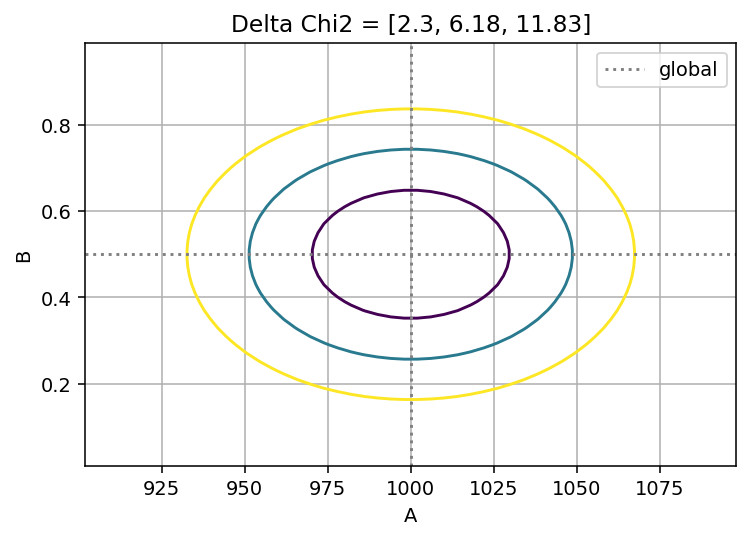

In [22]:
# plot Delta Chi2 for the usual 68/95/99% CL
scan2D.plot_grid_scan(cube_values=False,zaxis='DeltaChi2');

/Users/font/Library/Python/3.7/lib/python/site-packages/iminuit_minimizer.py:146: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig = plt.subplot(111)


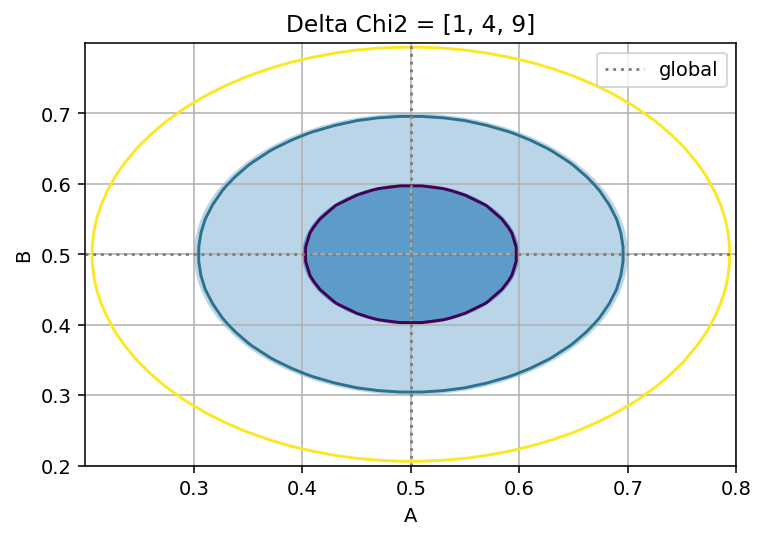

In [23]:
# compare to ellipses, using cube values, and for 1D sigmas
scan2D.plot_grid_scan(cube_values=True,zaxis='DeltaChi2',levels=[1,4,9])
minimizer.plot_ellipses(p1.name,p2.name,cube_values=True)

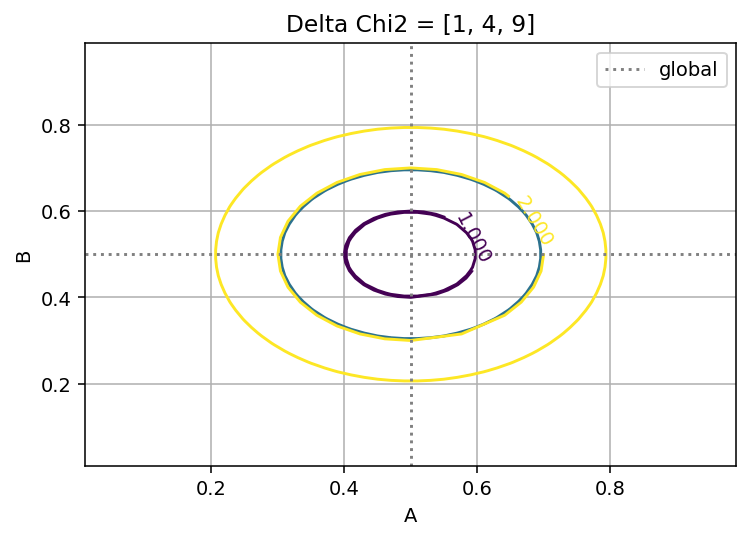

In [24]:
# compare to iminuit, using cube values, and for 1D sigmas
scan2D.plot_grid_scan(cube_values=True,zaxis='DeltaChi2',levels=[1,4,9])
#minimizer.plot_ellipses(p1.name,p2.name,cube_values=True)
minimizer.minimizer.draw_mncontour(p1.name,p2.name,numpoints=30)